<div class="container">
    <img src="https://images.ctfassets.net/q5ulk4bp65r7/XfpnWcyYUAckquSh7NTZe/d011308bbc484fd15edfcd4fb75ccd61/tokenomics.png" width="320" height="205" />
</div>


# Análise do Protocolo BZR

#### Parâmetros do Protocolo
Fornecimento Total de Tokens BZR: 1.101.100 (0% de inflação)

Modelo de Distribuição de Tokens: Ofertas de liquidez contínua

### Funcionalidade dos Tokens:
#### Governança
Utilidade (taxas mais baixas, desbloqueios prioritários de liquidez)
Propriedade fracionada coletiva do protocolo
Quantidade de Tokens para Distribuição: 1.101.100 (100% do fornecimento total)
Norma Técnica: ERC20, 18 casas decimais

#### Objetivo da Análise

Esta análise tem como objetivo investigar como diferentes profundidades de liquidez nos pools do Uniswap V3 respondem à pressão de venda, fornecendo insights cruciais sobre:

##### Profundidade de Liquidez: 
Determinar quanto de suprimento é necessário adicionar ao pool para alcançar a profundidade de liquidez desejada.

##### Impacto no Preço: 

Medir o impacto percentual no preço antes e após a realização de swaps, ajudando a entender a eficiência de mercado e a estabilidade de preços.

##### Eficácia da Liquidez: 

Avaliar a eficácia da liquidez adicionada em manter a estabilidade de preços durante grandes operações de swap.

### Metodologia

Identificação e configuração dos pools de liquidez.
Adição de diferentes quantidades de liquidez em diversos cenários de preço.

#### Execução e Análise dos Swaps:
Realização de swaps significativos para testar a profundidade da liquidez.
Cálculo do impacto no preço e análise de métricas de swap.

#### Visualizações e Comparações:
Criação de gráficos e visualizações para comparar preços antes e depois dos swaps.
Análise do impacto no preço em diferentes pools de liquidez.

#### Os resultados desta análise fornecerão informações detalhadas sobre:

- A quantidade de liquidez necessária para atingir a profundidade desejada.
- O impacto das operações de swap nos preços, essencial para a estabilidade do mercado.
- A eficácia das estratégias de provisionamento de liquidez em manter a estabilidade de preços, proporcionando uma base sólida para decisões estratégicas relacionadas ao token BZR.

## Setup

In [3]:
import shutil
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

from tx import txdict
from constants import GOD_ACCOUNT
from base18 import price_to_raw_tick,price_to_valid_tick,tick_to_price,fromBase128,toBase18, fromBase18, sqrtp_to_price
from constants import GOD_ACCOUNT
from UniV3Simulator import UniV3Simulator

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')



<Project 'UniV3ProjectBZR'>
Attached to local RPC client listening at '127.0.0.1:8545'...


In [4]:
# Global DataFrame
df = pd.DataFrame(columns=['Pool', 'Price Lower', 'Price Upper', 'Liquidity Added (Token0)', 'Liquidity Added (Token1)', 
                           'Price Before Swap', 'Swap Amount0', 'Swap Amount1', 'Price After Swap', 'Price Impact'])

## Resetando Liquidez do Pool



In [5]:
def reset_pools():


    folder_path = "v3_core/build/deployments"
    json_file1_path = "model_storage/token_pool_addresses.json"
    json_file2_path = "model_storage/liq_positions.json"


    # 1. Delete the folder and its contents
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)

    # 2. Delete contents of the first JSON file
    with open(json_file1_path, 'w') as file:
        file.write("{}")

    # 3. Delete contents of the second JSON file and add {}
    with open(json_file2_path, 'w') as file:
        file.write("{}")


reset_pools()

## Criando Novos Pools

### Criação de 4 pools de liquidez na Uniswap v3:

#### <center>bzr_weth_pool1</center>

|Supply BZR|Supply WETH|USDC|
|:-:|:-:|:-:|
|100|0,000000001|~0,0000034|


#### <center>bzr_weth_pool2</center>

|Supply BZR|Supply WETH|USDC|
|:-:|:-:|:-:|
|100000|1|~0,034|


#### <center>bzr_weth_pool3</center>

|Supply BZR|Supply WETH|USDC|
|:-:|:-:|:-:|
|1000000|1| ~0,0034|

#### <center>bzr_weth_pool4</center>

|Supply BZR|Supply WETH|USDC|
|:-:|:-:|:-:|
|1000|1| ~3,42|


In [6]:

def deploy_pools():
    
    """bzr_weth_pool1
        Supply BZR: 100
        Supply WETH: 0,000000001
        U$: ~0,0000034
        ========================
       bzr_weth_pool2
        Supply BZR: 100000
        Supply WETH: 1
        U$: ~0,034
        ========================
       bzr_weth_pool3
        Supply BZR: 1000000
        Supply WETH: 1
        U$: ~0,0034
        ========================
      bzr_weth_pool4
        Supply BZR: 1000
        Supply WETH: 1
        U$: ~3,42
    """ 

    bzr_weth_pool1 = UniV3Simulator(token0="BZR", token1="WETH", token0_decimals=18, token1_decimals=18, supply_token0=1e22, supply_token1=1e9, fee_tier=3000, initial_pool_price=0.00000000001, deployer=GOD_ACCOUNT)
    bzr_weth_pool2 = UniV3Simulator(token0="BZR1", token1="WETH", token0_decimals=18, token1_decimals=18, supply_token0=1e23, supply_token1=1e18, fee_tier=3000, initial_pool_price=0.00001, deployer=GOD_ACCOUNT)
    bzr_weth_pool3 = UniV3Simulator(token0="BZR2", token1="WETH", token0_decimals=18, token1_decimals=18, supply_token0=1e24, supply_token1=1e18, fee_tier=3000, initial_pool_price=0.000001, deployer=GOD_ACCOUNT)
    bzr_weth_pool4 = UniV3Simulator(token0="BZR3", token1="WETH", token0_decimals=18, token1_decimals=18, supply_token0=1e21, supply_token1=1e18, fee_tier=3000, initial_pool_price=0.001, deployer=GOD_ACCOUNT)

    # Make sure to return the created pool instances
    return bzr_weth_pool1, bzr_weth_pool2, bzr_weth_pool3, bzr_weth_pool4



In [7]:
# deploy_pools(), return the pool instances
bzr_weth_pool1, bzr_weth_pool2, bzr_weth_pool3, bzr_weth_pool4 = deploy_pools()
pools = [bzr_weth_pool1, bzr_weth_pool2, bzr_weth_pool3, bzr_weth_pool4]

Transaction sent: 0x50885a60cc455af063c48f0bab1e7953fd8608ce9dcb4e206572bf9ba8070da7
  Gas price: 20.000000001 gwei   Gas limit: 6721975   Nonce: 0
  Simpletoken.constructor confirmed   Block: 1   Gas used: 545794 (8.12%)
  Simpletoken deployed at: 0x5c9547db511f043c907042612D39410493c608ec

Transaction sent: 0x3059a5df11de9df40d317d0cee617f7d81c401c8ba7b9c1942723536ce0e069a
  Gas price: 20.000000001 gwei   Gas limit: 6721975   Nonce: 1
  Simpletoken.constructor confirmed   Block: 2   Gas used: 545758 (8.12%)
  Simpletoken deployed at: 0x6aB1a183424183b1c9023869B99b05d5817C9B1d

Transaction sent: 0x204b20a52f2f16bc9053d7767db156a6ec1ca53e17ba2ce695e2e7ecfc1690cf
  Gas price: 20.000000001 gwei   Gas limit: 6721975   Nonce: 2
  Simpletoken.constructor confirmed   Block: 3   Gas used: 545758 (8.12%)
  Simpletoken deployed at: 0x2CF8E50f07169826aB6bFDc68E75FDb86e6cbD91

Transaction sent: 0x1b1309638e0669414791bd60f587ca8e8973c2f5766878e949869efbff777ffa
  Gas price: 20.000000001 gwei   Gas

### State Functions
Verificando Estados e Saldos

In [8]:
def print_pool_state(pool):
    print(f'Configuração Global: {pool.get_global_state()}')
    print(f'Saldo nas contas: {pool.get_wallet_balances(GOD_ACCOUNT)}')
    print(f'Saldo Pools Token BZR: {pool.token0.balanceOf(pool.pool)}')
    print(f'Saldo Pools Token WETH: {pool.token1.balanceOf(pool.pool)}')

print_pool_state(bzr_weth_pool1)


Configuração Global: {'curr_sqrtPriceX96': 250541448375047920025600, 'curr_price': 1e-11, 'tick': -253298, 'feeGrowthGlobal0X128': 0, 'feeGrowthGlobal1X128': 0, 'liquidity_raw': 0, 'blockTimestamp': 1721245614, 'tickCumulative': 0, 'secondsPerLiquidityCumulativeX128': 0}
Saldo nas contas: {<Account '0xC5B539F92A97ef8B00713Ff7137F7E09e6C47664'>: {'ETH': 97.43023025246819, 'token0': 1e+22, 'token1': 1000000000.0}}
Saldo Pools Token BZR: 0
Saldo Pools Token WETH: 0


# Analysis


# Config Analysis

## Action functions
Estas são algumas das funções de ação que são utilizadas nesta análise, existem outras funções como remover liq, cobrar taxas entre outras.

In [9]:
# add_single_sided_liq function takes the directly amoount of token to be added in the pool while add_liq function takes usd_budget as input an dthen allocates that budget to token0 an dtoken 1 based on mounts calacluted by contract depending on the range
#mint_tx_receipt=bzr_weth_pool1.add_single_sided_liquidity(GOD_ACCOUNT, price_to_valid_tick(price_lower), price_to_valid_tick(price_upper), liquidity_amount, b'')
#mint_tx_receipt=bzr_weth_pool1.add_liquidty(GOD_ACCOUNT, price_to_valid_tick(price_lower), price_to_valid_tick(price_upper), liquidity_amount, b'')
#tx_dict = bzr_weth_pool1.swap_token0_for_token1(GOD_ACCOUNT, swap_amount, data=b'')
#tx_dict = bzr_weth_pool1.swap_token0_for_token1(GOD_ACCOUNT, swap_amount, data=b'')

## Analysis 1: Profundidade de Liquidez e Impacto no Preço

## Parâmetros de Configuração do Teste

- **pool_names**: Nomes identificadores para cada pool de liquidez.
- **liquidity_amounts**: Quantidades de liquidez a serem adicionadas em cada pool. Este parâmetro determina quanto de token BZR será fornecido à pool.
- **price_lower**: O preço mais baixo dentro do qual a liquidez será fornecida.
- **price_upper**: O preço mais alto dentro do qual a liquidez será fornecida.
- **zero_for_one**: Um booleano que indica a direção da troca. `True` indica troca de Token0 para Token1 e `False` indica o oposto.
- **swap_amount**: Quantidade de tokens a serem trocados durante o experimento. Este parâmetro é utilizado para realizar o swap entre os tokens dentro do pool.

### Objetivo da Análise

Esta análise visa investigar a profundidade de liquidez e o impacto no preço (slippage) ao adicionar diferentes quantidades de liquidez em diversos pools no Uniswap V3. Os resultados fornecerão insights sobre:

1. **Profundidade de Liquidez**: Quanto suprimento é necessário para adicionar ao pool para alcançar a profundidade de liquidez desejada.
2. **Impacto no Preço**: Medida do impacto percentual no preço antes e após a realização de swaps, o que é crucial para entender a eficiência de mercado e a estabilidade de preços.
3. **Eficácia da Liquidez**: Avaliar a eficácia da liquidez adicionada em manter a estabilidade de preços durante grandes operações de swap.

### Insights e Análises Adicionais

Para fornecer uma visão mais completa aos stakeholders, novas formas de análise e gráficos serão adicionados:

- **Distribuição da Liquidez Adicionada**: Visualização da quantidade de liquidez adicionada em cada pool.
- **Impacto no Preço ao Longo do Tempo**: Gráfico temporal mostrando a variação do impacto no preço com diferentes quantidades de liquidez.
- **Comparação Entre Pools**: Comparar a eficácia das diferentes pools em termos de profundidade de liquidez e impacto no preço.
- **Análise de Sensibilidade**: Avaliar a sensibilidade do impacto no preço a diferentes valores de `swap_amount`.


In [10]:
pool_names = ['Pool 1', 'Pool 2', 'Pool 3', 'Pool 4']
liquidity_amounts = [10e6, 20e6, 30e6, 100e6]
price_lower = 0.0021
price_upper = 1
zero_for_one = False
swap_amount = toBase18(1000)


In [11]:
def init_df():
    global df
    df = pd.DataFrame(columns=['Pool', 'Price Lower', 'Price Upper', 'Liquidity Added (Token0)', 'Liquidity Added (Token1)', 
                               'Price Before Swap', 'Swap Amount0', 'Swap Amount1', 'Price After Swap', 'Price Impact'])

def add_data_to_df(pool_name, price_lower, price_upper, amount0_initial, amount1_initial, price_before_swap, 
                   swap_amount0, swap_amount1, price_after_swap, price_impact):
    global df
    df.loc[len(df)] = [pool_name, price_lower, price_upper, amount0_initial, amount1_initial, price_before_swap, 
                       swap_amount0, swap_amount1, price_after_swap, price_impact]

def add_liquidity(pool, price_lower, price_upper, liquidity_amount):
    mint_tx_receipt = pool.add_single_sided_liquidity(GOD_ACCOUNT, price_to_valid_tick(price_lower), price_to_valid_tick(price_upper), liquidity_amount, b'')
    amount0_initial = mint_tx_receipt.events['Mint']['amount0']
    amount1_initial = mint_tx_receipt.events['Mint']['amount1']
    return amount0_initial, amount1_initial

def perform_swap(pool, swap_amount, zero_for_one):
    pool_state_before = pool.get_global_state()
    if zero_for_one:
        tx_dict = pool.swap_token0_for_token1(GOD_ACCOUNT, swap_amount, data=b'')
    else:
        tx_dict = pool.swap_token1_for_token0(GOD_ACCOUNT, swap_amount, data=b'')
    pool_state_after = pool.get_global_state()
    return pool_state_before, tx_dict, pool_state_after

def calculate_price_impact(price_before, price_after):
    return ((price_after - price_before) / price_before) * 100

def swap(pool, amount, zero_for_one):
    try:
        pool_state_before, tx_dict, pool_state_after = perform_swap(pool, amount, zero_for_one)
        logging.info(f"Swap realizado no pool: {pool.pool_name}")
        logging.info(f"Estado do pool antes do swap: {pool_state_before}")
        logging.info(f"Estado do pool depois do swap: {pool_state_after}")
        return pool_state_before, tx_dict, pool_state_after
    except Exception as e:
        logging.error(f"Erro ao realizar swap no pool {pool.pool_name}: {e}")
        raise e


def get_price_impact(pool):
    try:
        current_price = pool.get_current_price()
        logging.info(f"Preço atual do pool {pool.pool_name}: {current_price}")
        return current_price
    except Exception as e:
        logging.error(f"Erro ao obter preço do pool {pool.pool_name}: {e}")
        raise e



In [12]:
def experiment_with_pool(pool_name, pool, price_lower, price_upper, liquidity_amount):
    amount0_initial, amount1_initial = add_liquidity(pool, price_lower, price_upper, liquidity_amount)
    pool_state_before, tx_dict, pool_state_after = perform_swap(pool, swap_amount, zero_for_one)
    price_before_swap = sqrtp_to_price(pool_state_before['curr_sqrtPriceX96'])
    price_after_swap = sqrtp_to_price(pool_state_after['curr_sqrtPriceX96'])
    price_impact = calculate_price_impact(price_before_swap, price_after_swap)
    add_data_to_df(pool_name, price_lower, price_upper, fromBase18(amount0_initial), fromBase18(amount1_initial), 
                   price_before_swap, tx_dict.events['Swap']['amount0'], tx_dict.events['Swap']['amount1'], price_after_swap, price_impact)



In [13]:
init_df()

for i, pool in enumerate(pools):
    experiment_with_pool(pool_names[i], pool, price_lower, price_upper, liquidity_amounts[i])


Transaction sent: 0xbe6eff20c818e23da8f386c95143b67b325dd00a46713832fda254697a944209
  Gas price: 20.000000001 gwei   Gas limit: 5000000   Nonce: 177
  UniswapV3Pool.mint confirmed   Block: 178   Gas used: 207762 (4.16%)

Transaction sent: 0xc92620621b6bc2121e959e57b51470312f377e04522934d090e94c9e619f4620
  Gas price: 20.000000001 gwei   Gas limit: 5000000   Nonce: 178
  Simpletoken.transfer confirmed   Block: 179   Gas used: 51566 (1.03%)

Transaction sent: 0x1a5a880cb3acce38dd4fa50cea67ff7343e2dfb5454275e424979f601229d61f
  Gas price: 20.000000001 gwei   Gas limit: 5000000   Nonce: 179
  UniswapV3Pool.swap confirmed   Block: 180   Gas used: 210523 (4.21%)

Transaction sent: 0x0971d38f4d04711291bacfbbcd873fbb58e0afa4c6ee0eb38b2d5136d25ffbc7
  Gas price: 20.000000001 gwei   Gas limit: 5000000   Nonce: 180
  Simpletoken.transfer confirmed   Block: 181   Gas used: 51518 (1.03%)

Transaction sent: 0xc1d6327e926b03521802d5bd0a793b5d52a7a9527b4a216c86b6ff2ac3ac387c
  Gas price: 20.000000001

### Resultados

In [14]:
df.head()

,Pool,Price Lower,Price Upper,Liquidity Added (Token0),Liquidity Added (Token1),Price Before Swap,Swap Amount0,Swap Amount1,Price After Swap,Price Impact
0,Pool 1,0.0021,1,1.000000e+07,0.0,1.000000e-11,-455000913281849077143976,1000000000000000000000,0.002291,2.290658e+10
1,Pool 2,0.0021,1,2.000000e+07,0.0,1.000000e-05,-465097474285552899394442,1000000000000000000000,0.002192,2.182284e+04
2,Pool 3,0.0021,1,3.000000e+07,0.0,1.000000e-06,-468563312064672511578840,1000000000000000000000,0.002160,2.158972e+05
3,Pool 4,0.0021,1,1.000000e+08,0.0,1.000000e-03,-473503178248028132308222,1000000000000000000000,0.002115,1.115139e+02


In [15]:
### Impacto no Preço

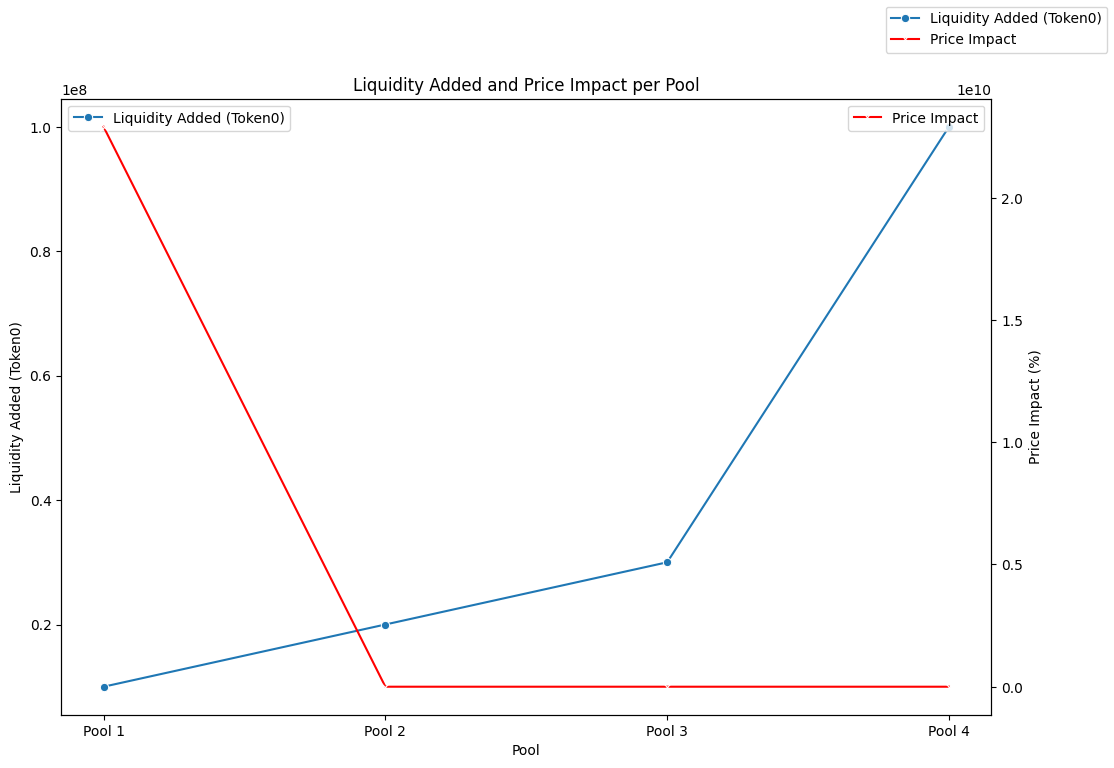

In [16]:
def plot_liquidity_price_impact(df):
    fig, ax1 = plt.subplots(figsize=(12, 8))

    sns.lineplot(data=df, x='Pool', y='Liquidity Added (Token0)', marker='o', label='Liquidity Added (Token0)', ax=ax1)
    ax1.set_ylabel('Liquidity Added (Token0)')
    ax1.set_title('Liquidity Added and Price Impact per Pool')
    
    ax2 = ax1.twinx()
    sns.lineplot(data=df, x='Pool', y='Price Impact', marker='x', color='r', label='Price Impact', ax=ax2)
    ax2.set_ylabel('Price Impact (%)')

    fig.legend(loc='upper right')
    plt.show()

plot_liquidity_price_impact(df)


### Distribuição de Preços Antes e Depois do Swap

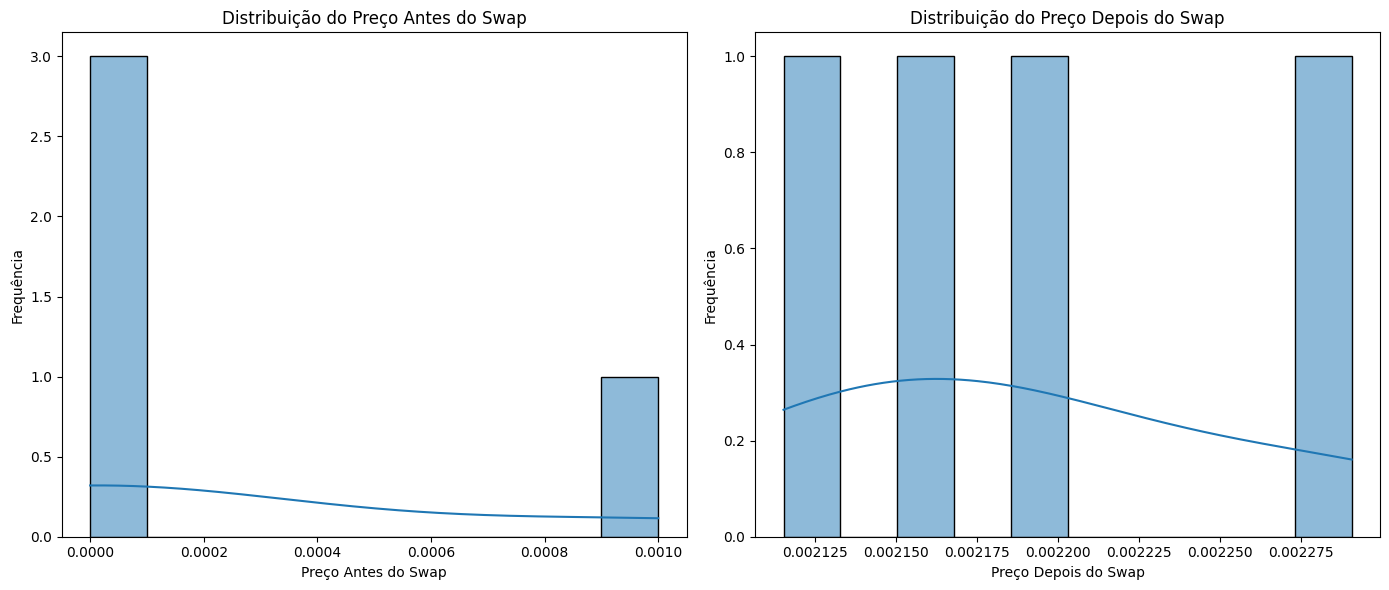

In [17]:
def plot_price_distribution(df):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    sns.histplot(df['Price Before Swap'], bins=10, kde=True, ax=ax[0])
    ax[0].set_title('Distribuição do Preço Antes do Swap')
    ax[0].set_xlabel('Preço Antes do Swap')
    ax[0].set_ylabel('Frequência')

    sns.histplot(df['Price After Swap'], bins=10, kde=True, ax=ax[1])
    ax[1].set_title('Distribuição do Preço Depois do Swap')
    ax[1].set_xlabel('Preço Depois do Swap')
    ax[1].set_ylabel('Frequência')

    plt.tight_layout()
    plt.show()

plot_price_distribution(df)


### Impacto no Preço por Pool

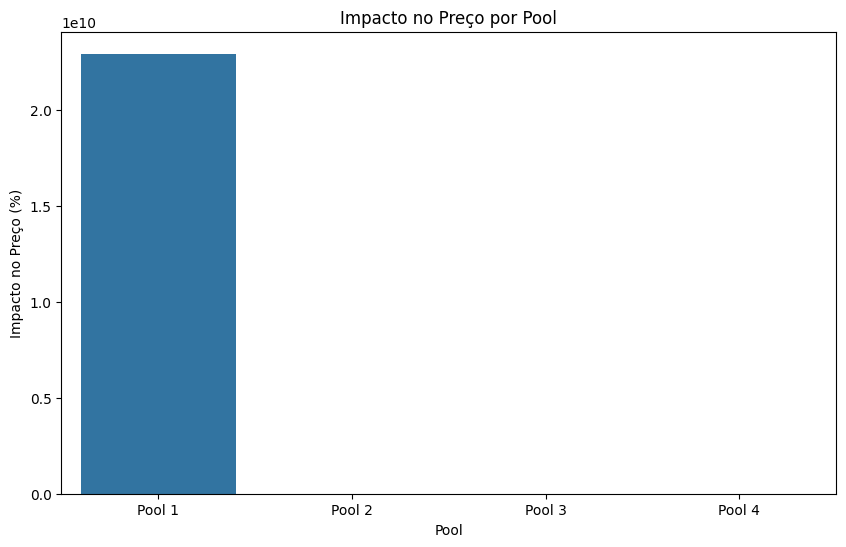

In [18]:
def plot_price_impact_by_pool(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Pool', y='Price Impact', data=df)
    plt.title('Impacto no Preço por Pool')
    plt.xlabel('Pool')
    plt.ylabel('Impacto no Preço (%)')
    plt.show()

plot_price_impact_by_pool(df)


In [19]:
### Distribuição da Liquidez Adicionada

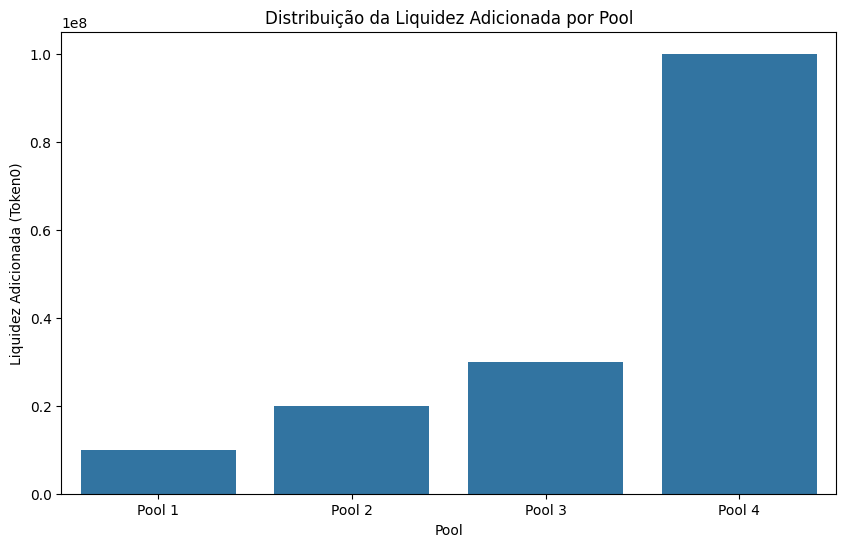

In [20]:
def plot_liquidity_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Pool', y='Liquidity Added (Token0)', data=df)
    plt.title('Distribuição da Liquidez Adicionada por Pool')
    plt.xlabel('Pool')
    plt.ylabel('Liquidez Adicionada (Token0)')
    plt.show()

plot_liquidity_distribution(df)


In [21]:
### Impacto no Preço ao Longo do Tempo

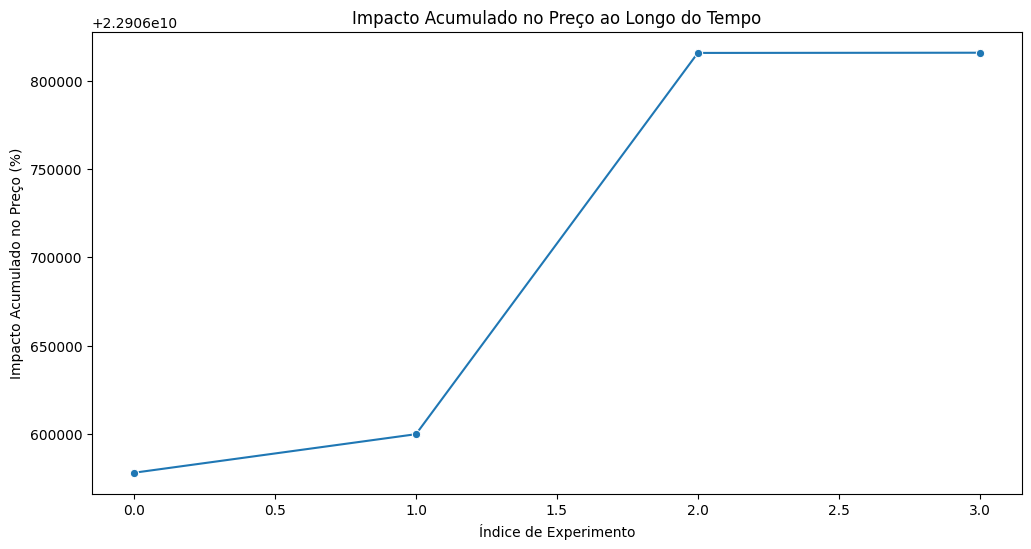

In [22]:
def plot_price_impact_over_time(df):
    df['Cumulative Price Impact'] = df['Price Impact'].cumsum()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df.index, y='Cumulative Price Impact', data=df, marker='o')
    plt.title('Impacto Acumulado no Preço ao Longo do Tempo')
    plt.xlabel('Índice de Experimento')
    plt.ylabel('Impacto Acumulado no Preço (%)')
    plt.show()

plot_price_impact_over_time(df)


In [23]:
### Comparação Entre Pools

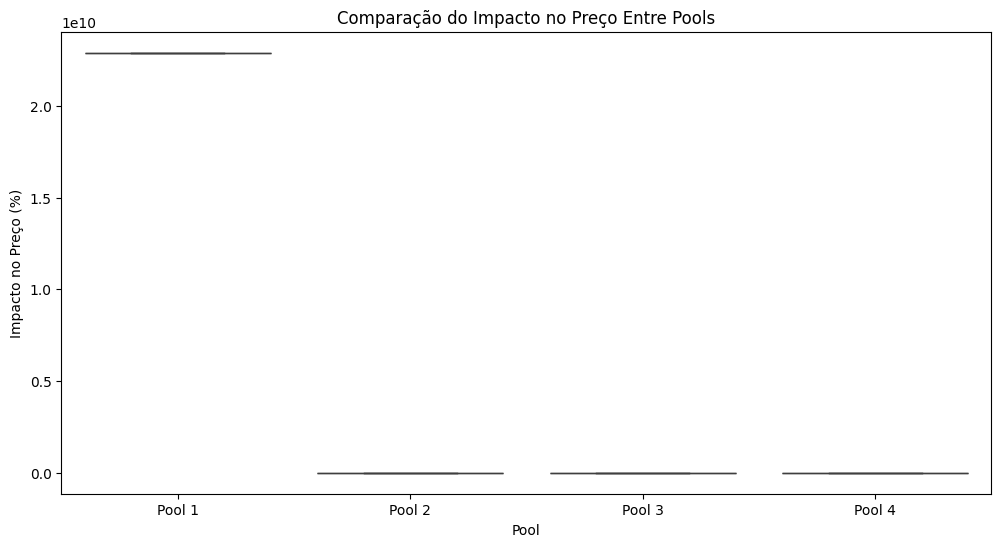

In [24]:
def compare_pools(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Pool', y='Price Impact', data=df)
    plt.title('Comparação do Impacto no Preço Entre Pools')
    plt.xlabel('Pool')
    plt.ylabel('Impacto no Preço (%)')
    plt.show()

compare_pools(df)


## Analysis 2: Como os pools com profundidade de liquidez diferente responderão à pressão de venda?

In [25]:
# Inicializar DataFrame para armazenar resultados
columns = ['Pool', 'Price Before Swap', 'Swap Amount0', 'Swap Amount1', 'Price After Swap', 'Price Impact']
df = pd.DataFrame(columns=columns)

# Função para realizar e analisar o swap
def perform_and_analyze_swap(pool, pool_name, swap_amount, zero_for_one):
    # Perform the swap based on the direction indicated by zero_for_one
    pool_state_before, tx_dict, pool_state_after = perform_swap(pool, swap_amount, zero_for_one)
    
    # Calculate price impact
    price_before_swap = sqrtp_to_price(pool_state_before['curr_sqrtPriceX96'])
    price_after_swap = sqrtp_to_price(pool_state_after['curr_sqrtPriceX96'])
    price_impact = calculate_price_impact(price_before_swap, price_after_swap)
    
    # Determine swapped amounts
    swap_amount0 = tx_dict.events['Swap']['amount0'] if zero_for_one else 0
    swap_amount1 = tx_dict.events['Swap']['amount1'] if not zero_for_one else 0
    
    # Add swap data to the DataFrame, focusing only on swap metrics
    global df
    df.loc[len(df)] = [pool_name, price_before_swap, swap_amount0, swap_amount1, price_after_swap, price_impact]

# Re-inicializar o DataFrame se necessário (caso esteja reexecutando a análise)
df = pd.DataFrame(columns=columns)

In [26]:
# Definir parâmetros para a análise
swap_amount = toBase18(10000)  # Quantidade de swap a ser realizada
zero_for_one = True  # Direção do swap (ajuste conforme necessário)

# Executar swaps reversos e analisar
for i, pool in enumerate(pools):
    perform_and_analyze_swap(pool, pool_names[i], swap_amount, zero_for_one)




Transaction sent: 0x2c4717049d90dc8a8c94024f8b947418c4194ef5fa35edc64865f6a77ba3541a
  Gas price: 20.001 gwei   Gas limit: 5000000   Nonce: 193
  UniswapV3Pool.swap confirmed   Block: 194   Gas used: 96627 (1.93%)

Transaction sent: 0x877039ae3715be289580c387e8a43a668a2af3d2891659e48fe42c6bc9f491df
  Gas price: 20.001 gwei   Gas limit: 5000000   Nonce: 194
  Simpletoken.transfer confirmed   Block: 195   Gas used: 36530 (0.73%)

Transaction sent: 0x83ff2c94f5ccc6a29bb886e871a67ad02b0d406805389d5cabb8f4591712b6a0
  Gas price: 20.001 gwei   Gas limit: 5000000   Nonce: 195
  UniswapV3Pool.swap confirmed   Block: 196   Gas used: 96615 (1.93%)

Transaction sent: 0x60fe22d7c4308c10efc504bc91a5c5bc710f7bccd07678a8c3092ba631fac3a4
  Gas price: 20.001 gwei   Gas limit: 5000000   Nonce: 196
  Simpletoken.transfer confirmed   Block: 197   Gas used: 36530 (0.73%)

Transaction sent: 0xf3d68e3088234695d1f78417e2d0232525c2c72f470586ee4c3ec3a218120300
  Gas price: 20.001 gwei   Gas limit: 5000000   Non

In [27]:
# Exibir os primeiros resultados no DataFrame
df.head()

,Pool,Price Before Swap,Swap Amount0,Swap Amount1,Price After Swap,Price Impact
0,Pool 1,0.002291,10000000000000000000000,0,0.002286,-0.198610
1,Pool 2,0.002192,10000000000000000000000,0,0.002190,-0.097223
2,Pool 3,0.002160,10000000000000000000000,0,0.002159,-0.064352
3,Pool 4,0.002115,10000000000000000000000,0,0.002115,-0.019111


In [28]:
### Comparação de Preço Antes e Depois do Swap por Pool

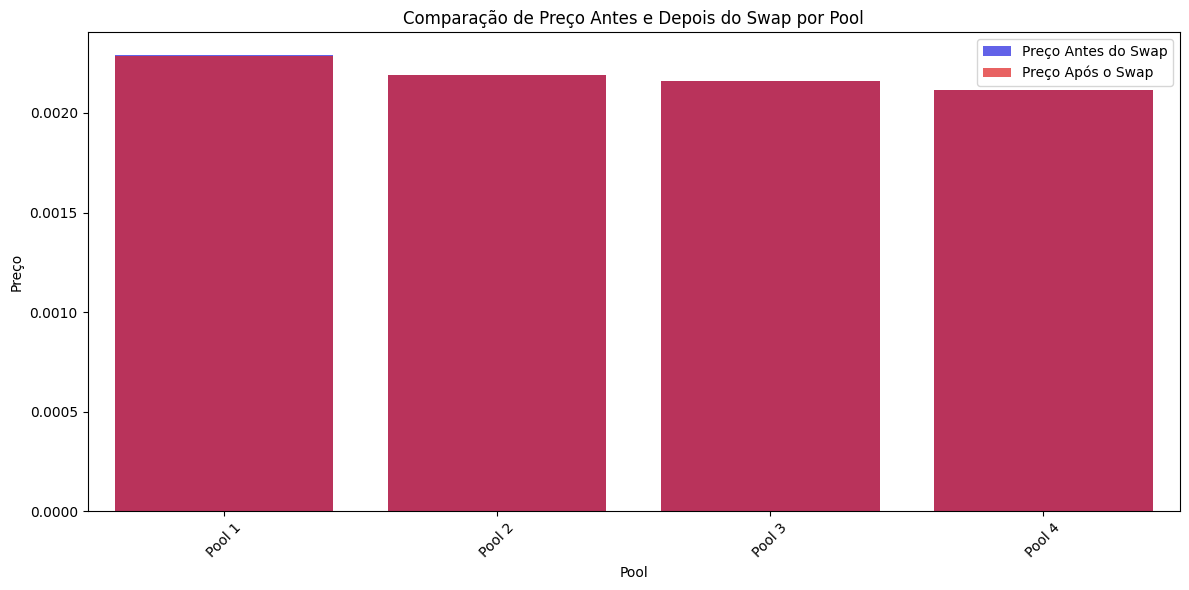

In [29]:
def plot_price_comparison(df):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Pool', y='Price Before Swap', data=df, color='blue', alpha=0.7, label='Preço Antes do Swap')
    sns.barplot(x='Pool', y='Price After Swap', data=df, color='red', alpha=0.7, label='Preço Após o Swap')
    plt.title('Comparação de Preço Antes e Depois do Swap por Pool')
    plt.xlabel('Pool')
    plt.ylabel('Preço')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Utilização da função
plot_price_comparison(df)


In [30]:
### Visualização do Impacto no Preço por Pool

C:\Users\fernando_bazardocons\AppData\Local\Temp\ipykernel_19200\3021573767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pool', y='Price Impact', data=df, palette='coolwarm')


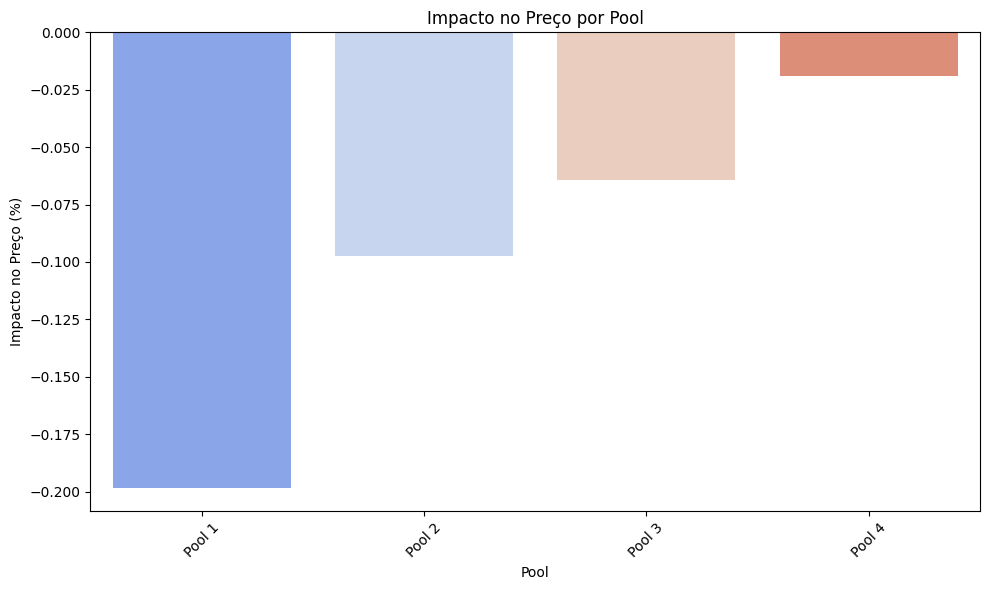

In [31]:
def plot_price_impact(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Pool', y='Price Impact', data=df, palette='coolwarm')
    plt.title('Impacto no Preço por Pool')
    plt.xlabel('Pool')
    plt.ylabel('Impacto no Preço (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Utilização da função
plot_price_impact(df)
